# Data Science Project - Marketing Advertisement Analysis

## Supervised Learning: Regression and Prediction

### By Ping.T


### Context

The purpose of this data science project is to analyze the relationship between marketing advertisement budgets and sales using linear regression models. The dataset includes three independent variables: Social_Media, Press_Media, and Broadcast_Media, which quantify the budgets allocated to different advertising channels. The dependent variable, Sales, represents the sales figures. By applying linear regression, we aim to understand how changes in the budgets for social media, press media, and broadcast media impact sales. This analysis will provide insights into the effectiveness of various advertising channels. 

### Objective
By understanding the relationship between budgets allocated to various advertising channels, we can make data-driven decisions to optimize resource allocation and increase the effectiveness of advertising campaigns, optimize marketing strategies, ultimately driving higher sales and improving marketing ROI. In this case study, data modeling, performance evaluation, and prediction of sales are given by different parameters of advertising channels. The trained data modeling would be used for future datasets for planning marketing activities. 


### Data Description

The data at hand has three features about the spending on advertising and the target variable is the net sales. Attributes are:

- Social    - Independent variable quantifying budget for Social Media ads, Twitter, Facebook, Instagram
- Press     - Independent variable quantifying budget for Press Media ads, Digital Publications, Journals, Blogs
- Broadcast - Independent variable quantifying budget for Broadcast Media ads, Television, Radio
- Sales     - Dependent variable

### Libraries Used

**Pandas:**

Pandas is a powerful data manipulation and analysis library. It provides data structures and functions to efficiently handle structured data. In the script, it is used to work with data in the form of DataFrames.

**Numpy:**

Numpy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and a wide range of mathematical functions. In the script, it is used for reshaping data arrays and performing mathematical operations.

**Sklearn:**

Sklearn, or scikit-learn, is a popular machine learning library that provides various tools and algorithms for tasks such as regression, classification, clustering, and model evaluation. In the script, it is used for fitting linear regression models.

**Matplotlib:**

Matplotlib is a plotting library that allows you to create a wide variety of visualizations in Python. pyplot is a module within matplotlib that provides a MATLAB-like interface for creating plots and charts. In the project, it is used to visualize the scatter plots and regression lines.

**Statsmodels:**

Statsmodels is a library that provides classes and functions for statistical modeling and analysis. In the project, it is used to fit linear regression models and obtain detailed model statistics.

These libraries are commonly used in marketing analytics and data analysis tasks to perform regression analysis, visualize data, and obtain statistical insights.


## Importing Necessary Packages

In [238]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [239]:
Ad_df = pd.read_csv('Marketing_Ad.csv')

# load the data into the Ad_df data frame.
Ad_df.head()

,Unnamed: 0,Social,Press,Broadcast,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [240]:
# Drop the first column as it is just the index
Ad_df.drop(columns = 'Unnamed: 0', inplace=True)

In [241]:
Ad_df

,Social,Press,Broadcast,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [242]:
Ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Social     200 non-null    float64
 1   Press      200 non-null    float64
 2   Broadcast  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Observations:** All the variables are of float data type.

## Simple Linear Regression

In [243]:
# Dataset is stored in a Pandas Dataframe. Take out all the variables in a numpy array.
Sales = Ad_df.Sales.values.reshape(len(Ad_df['Sales']), 1)
Social = Ad_df.Social.values.reshape(len(Ad_df['Sales']), 1)
Press = Ad_df.Press.values.reshape(len(Ad_df['Sales']), 1)
Broadcast = Ad_df.Broadcast.values.reshape(len(Ad_df['Sales']), 1)

In [244]:
# Use one feature at a time and have a look at the target variable

# let us fit the simple linear regression model with the TV feature
social_model = linear_model.LinearRegression()
social_model.fit(Social, Sales)
coeffs_social = np.array(list(social_model.intercept_.flatten()) + list(social_model.coef_.flatten()))
coeffs_social = list(coeffs_social)

# let us fit the simple linear regression model with the Radio feature
press_model = linear_model.LinearRegression()
press_model.fit(Press, Sales)
coeffs_press = np.array(list(press_model.intercept_.flatten()) + list(press_model.coef_.flatten()))
coeffs_press = list(coeffs_press)

# let us fit the simple linear regression model with the Newspaper feature
broadcast_model = linear_model.LinearRegression()
broadcast_model.fit(Broadcast, Sales)
coeffs_broadcast = np.array(list(broadcast_model.intercept_.flatten()) + list(broadcast_model.coef_.flatten()))
coeffs_broadcast = list(coeffs_broadcast)

# let us store the above results in a dictionary and then display using a dataframe
dict_Sales = {}
dict_Sales["Social"] = coeffs_social
dict_Sales["Press"] = coeffs_press
dict_Sales["Broadcast"] = coeffs_broadcast

metric_Df_SLR =  pd.DataFrame(dict_Sales)
metric_Df_SLR.index = ['Intercept', 'Coefficient']
metric_Df_SLR

,Social,Press,Broadcast
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


In [245]:
# Calculate R^2
social_rsq = social_model.score(Social, Sales)
press_rsq = press_model.score(Press, Sales)
broadcast_rsq = broadcast_model.score(Broadcast, Sales)

print("Social simple linear regression R-Square :", social_rsq)
print("Press simple linear regression R-Square :", press_rsq)
print("Broadcast simple linear regression R-Square :", broadcast_rsq)
list_rsq = [social_rsq, press_rsq, broadcast_rsq]
list_rsq

Social simple linear regression R-Square : 0.611875050850071
Press simple linear regression R-Square : 0.33203245544529525
Broadcast simple linear regression R-Square : 0.05212044544430516


[0.611875050850071, 0.33203245544529525, 0.05212044544430516]

In [246]:
metric_Df_SLR.loc['R-Squared'] = list_rsq
metric_Df_SLR

,Social,Press,Broadcast
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693
R-Squared,0.611875,0.332032,0.052120


**Observations:** 

- Social Media has the highest R-squared value of 0.612, indicating that approximately 61% of the variance in sales can be explained by the Social Media variable alone.
- Press Media has an R-squared value of 0.332, suggesting that around 33% of the variance in sales can be explained by the Press Media variable.
- Broadcast Media has the lowest R-squared value of 0.052, implying that only about 5% of the variance in sales can be explained by the Broadcast Media variable.
- Social Media has the highest impact on sales among the three variables. It appears to be the most influential factor in driving sales, followed by Press Media and then Broadcast Media.

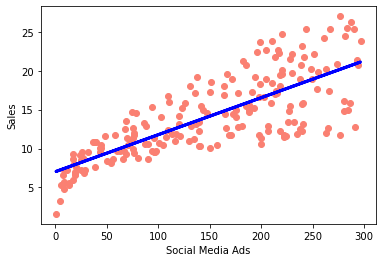

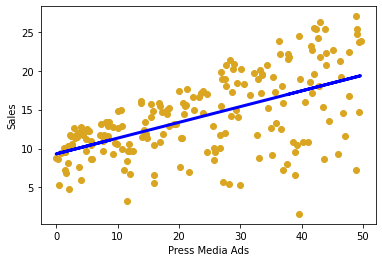

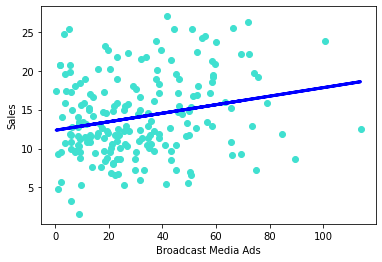

In [247]:
#Visualize the best fit line using the regression plot

plt.scatter(Social, Sales,  color='salmon')
plt.xlabel('Social Media Ads')
plt.ylabel('Sales')
plt.plot(Social, social_model.predict(Social), color='blue', linewidth=3)
plt.show()

plt.scatter(Press, Sales,  color='goldenrod')
plt.xlabel('Press Media Ads')
plt.ylabel('Sales')
plt.plot(Press, press_model.predict(Press), color='blue', linewidth=3)
plt.show()

plt.scatter(Broadcast, Sales,  color='turquoise')
plt.xlabel('Broadcast Media Ads')
plt.ylabel('Sales')
plt.plot(Broadcast, broadcast_model.predict(Broadcast), color='blue', linewidth=3)
plt.show()


## Multiple Linear Regression

In [248]:
mlr_model = linear_model.LinearRegression()
mlr_model.fit(Ad_df[['Social', 'Press', 'Broadcast']], Ad_df['Sales'])

LinearRegression()

In [249]:
Ad_df['Sales_Predicted']  = mlr_model.predict(Ad_df[['Social', 'Press', 'Broadcast']]) 
Ad_df['Error'] = (Ad_df['Sales_Predicted'] - Ad_df['Sales'])**2
MSE_MLR = Ad_df['Error'].mean()

In [250]:
MSE_MLR

2.784126314510936

In [251]:
mlr_model.score(Ad_df[['Social', 'Press', 'Broadcast']], Ad_df['Sales'])

0.8972106381789522

**Observations:** 

- In the case of multiple linear regression, the model considers all three variables (Social, Press, and Broadcast) simultaneously to predict the Sales.
- The multiple linear regression model has an R-squared value of 0.897, indicating that approximately 89.7% of the variance in sales can be explained by the combination of Social, Press, and Broadcast variables together.
- The Mean Squared Error (MSE) for the multiple linear regression model is 2.784. MSE measures the average squared difference between the predicted and actual values, and a lower value indicates a better fit of the model to the data.
- Therefore, the multiple linear regression model performs significantly better than the simple linear regression models. It suggests that when considering all three variables together, Social, Press, and Broadcast have a strong impact on sales, and their combined effect provides a more accurate prediction of sales compared to using individual variables separately.

In [281]:
# Get a more detailed model through statsmodel.
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Sales ~ Social+Press+Broadcast', data = Ad_df).fit()
lm1.params
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           1.58e-96
Time:                        15:10:46   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

**Observations:** 

- The coefficients for the predictors are Social: 0.0458, Press: 0.1885, Broadcast: -0.0010. The coefficient of Broadcast suggests a very small effect on sales.
- The p-values associated with the coefficients indicate that Social and Press have a significant impact on sales (p < 0.001), whereas the coefficient for Broadcast is not statistically significant (p = 0.860). 
- The intercept is 2.9389, which represents the expected sales when all predictor variables (Social, Press, and Broadcast) are zero.
- The F-statistic is 570.3, with a corresponding p-value of 1.58e-96, indicating that the overall model is statistically significant.
- The Omnibus test and Jarque-Bera test suggest that the residuals of the model are not normally distributed, as indicated by significant p-values (p < 0.001).

In [253]:
print("*************Parameters**************")
print(lm1.params)
print("*************P-Values**************")
print(lm1.pvalues)
print("************Standard Errors***************")
print(lm1.bse) 
print("*************Confidence Interval**************")
print(lm1.conf_int())
print("*************Error Covariance Matrix**************")
print(lm1.cov_params())


*************Parameters**************
Intercept    2.938889
Social       0.045765
Press        0.188530
Broadcast   -0.001037
dtype: float64
*************P-Values**************
Intercept    1.267295e-17
Social       1.509960e-81
Press        1.505339e-54
Broadcast    8.599151e-01
dtype: float64
************Standard Errors***************
Intercept    0.311908
Social       0.001395
Press        0.008611
Broadcast    0.005871
dtype: float64
*************Confidence Interval**************
                  0         1
Intercept  2.323762  3.554016
Social     0.043014  0.048516
Press      0.171547  0.205513
Broadcast -0.012616  0.010541
*************Error Covariance Matrix**************
           Intercept        Social         Press     Broadcast
Intercept   0.097287 -2.657273e-04 -1.115489e-03 -5.910212e-04
Social     -0.000266  1.945737e-06 -4.470395e-07 -3.265950e-07
Press      -0.001115 -4.470395e-07  7.415335e-05 -1.780062e-05
Broadcast  -0.000591 -3.265950e-07 -1.780062e-05  3.446875

**Observations:** 

- **Parameters:** The parameters represent the estimated coefficients of the independent variables in the multiple linear regression model. They indicate the expected change in the dependent variable (Sales) for a unit change in each independent variable, holding other variables constant.

- **P-values:** The p-values associated with each coefficient indicate the statistical significance of the corresponding independent variable. It measures the probability of observing a coefficient as extreme as the estimated coefficient if the null hypothesis (no relationship between the independent variable and the dependent variable) is true.

- **Standard Errors:** The standard errors provide an estimate of the variability or uncertainty associated with the estimated coefficients. They measure the average amount that the estimated coefficient deviates from the true coefficient.

- **Confidence Intervals:** The confidence intervals provide a range of values within which the true population parameters are likely to fall with a certain level 95% of confidence. The confidence interval indicates the uncertainty associated with the estimated coefficients.

Overall, the parameter estimates, p-values, standard errors, and confidence intervals provide insights into the relationships between the independent variables (Social, Press, Broadcast) and the dependent variable (Sales) in the multiple linear regression model.

### Confidence Bands in Simple linear regression

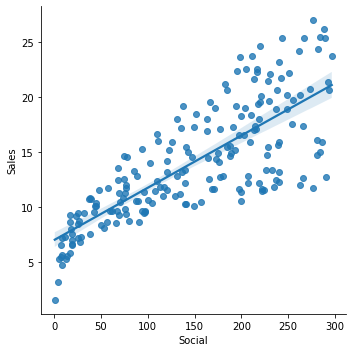

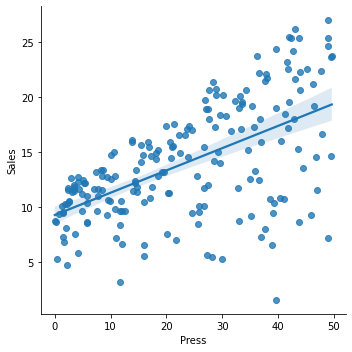

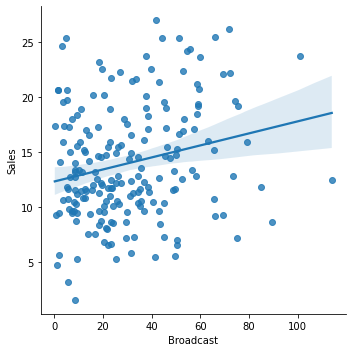

In [254]:
import seaborn as sns
sns.lmplot(x = 'Social', y = 'Sales', data = Ad_df)

sns.lmplot(x = 'Press', y = 'Sales', data = Ad_df)

sns.lmplot(x = 'Broadcast', y = 'Sales', data = Ad_df)

**Observations:** 

- Three scatter plots with fitted linear regression lines. Each plot represents a simple linear regression analysis between an independent variable (Social, Press, or Broadcast) and the dependent variable (Sales). 
- The confidence bands represent the uncertainty around the estimated regression line. A narrower confidence band suggests that the estimated regression line is more precise and has less variability.
- A narrower confidence band in the scatter plot suggests higher precision in the estimated regression line for the 'Social' variable, while it is important to evaluate the complete regression analysis, including the statistical measures and other diagnostic tests, to determine the best fit model.

## Cross Validation and Bootstrapping

In [255]:
# Realize that the broadcast can be omitted from the list of significant features owing to the p-value >0.05
# Run the regression analysis adding a multiplicative feature of Social_Press as combining social and press for modeling

Ad_df['Social_Press'] = Ad_df['Social']*Ad_df['Press']

In [256]:
# Remove the sales_predicted and the error column generated earlier
Ad_df.drop(columns = ["Error", "Sales_Predicted"], inplace = True)

In [257]:
# Modelling with the new feature Social_Press
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'Sales ~ Social+Press+Broadcast+Social_Press', data = Ad_df).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          2.92e-144
Time:                        13:44:55   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.7284      0.253     26.561   

**Observations**

- A new feature called "Social_Press" is created by multiplying the "Social" and "Press" variables.
- The previous model is modified to include the new feature, and the regression analysis is performed using the "statsmodels" library.
- The summary of the regression model is printed, showing the coefficients, p-values, R-squared, and other statistical metrics.
- The R-squared value of the model is 0.968, indicating that around 96.8% of the variance in the dependent variable "Sales" is explained by the independent variables.
- The model also provides coefficients and their corresponding p-values, which can be used to determine the significance of each variable.
- Although an increase in the R-square 0.968 after adding a new feature. However, it is not enough to prove that this model is useful for prediction with unseen data. Further performance assessment is required.

## Performance Assessment, Testing and Validation

### Train, Test, and Validation set

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
# Split data into three sets
# One to train the model, one to validate the model performance (not seen during training) and make improvements
# last one to test the model

features_base = [i for i in Ad_df.columns if i not in ("Sales" , "Social_Press")]
features_added = [i for i in Ad_df.columns if i not in "Sales"]
target  = 'Sales'
train, test = train_test_split(Ad_df, test_size = 0.10, train_size = 0.9)

In [260]:
train, validation = train_test_split(train, test_size = 0.2, train_size = 0.80)

In [261]:
train.shape, validation.shape,test.shape

((144, 5), (36, 5), (20, 5))

In [262]:
# Modeling for performance assessment
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(train[features_base], train[target])
print("*********Training set Metrics**************")
print("R-Squared:", mlr.score(train[features_base], train[target]))
se_train = (train[target] - mlr.predict(train[features_base]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", mlr.score(validation[features_base], validation[target]))
se_val = (validation[target] - mlr.predict(validation[features_base]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.900374433647009
MSE:  2.7100674955356596
********Validation set Metrics**************
R-Squared: 0.9067391777653113
MSE:  2.3066416484048715


**Observations**

- The data is split into training, validation, and test sets using the train_test_split function from scikit-learn.
- A simple linear regression model is trained using the training set, and its performance is evaluated on both the training and validation sets.
- The R-squared and Mean Squared Error (MSE) metrics are calculated for both sets.
- The R-squared values for the training and validation sets are 0.900 and 0.907, respectively, indicating a good fit of the model to the data.
- The MSE values for the training and validation sets are 2.710 and 2.307, respectively, providing an estimate of the average squared error of the model's predictions.
- The evaluation suggests that the model performs well on both the training and validation sets, indicating its potential for prediction.

In [263]:
# See if model performance really increases by adding the new feature 
# Although already found that in the analysis above, check the same for the validation dataset

mlr_added_feature = LinearRegression()
mlr_added_feature.fit(train[features_added], train[target])
print("*********Training set Metrics**************")
print("R-Squared:", mlr_added_feature.score(train[features_added], train[target]))
se_train = (train[target] - mlr_added_feature.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", mlr_added_feature.score(validation[features_added], validation[target]))
se_val = (validation[target] - mlr_added_feature.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9659213422397553
MSE:  0.9270257230989416
********Validation set Metrics**************
R-Squared: 0.9720593653803481
MSE:  0.691062226905609


**Observations**

- Another linear regression model is trained using only the added feature variables ("Social", "Press", "Broadcast", and "Social_Press").
- The performance of this model is evaluated on the training and validation sets, similar to the previous model.
- The R-squared values for the training and validation sets are 0.966 and 0.972, respectively, indicating an improvement in performance compared to the previous model.
- The MSE values for the training and validation sets are 0.927 and 0.691, respectively, suggesting a decrease in prediction errors.
- Compare to the above two performance assessment, R-squared increased and error decreased after adding a feature.

### Regularization 

In [264]:
# Fit a regularized model with adding feature to avoid overfitting

features_added

['Social', 'Press', 'Broadcast', 'Social_Press']

In [265]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#fitting Ridge with the default features
ridge = Ridge()
ridge.fit(train[features_added], train[target])

print("*********Training set Metrics**************")
print("R-Squared:", ridge.score(train[features_added], train[target]))
se_train = (train[target] - ridge.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", ridge.score(validation[features_added], validation[target]))
se_val = (validation[target] - ridge.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9659213422044987
MSE:  0.927025724058014
********Validation set Metrics**************
R-Squared: 0.9720588837994659
MSE:  0.6910741379577896


In [266]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#fitting Lasso with the default features
lasso = Lasso()
lasso.fit(train[features_added], train[target])

print("*********Training set Metrics**************")
print("R-Squared:", lasso.score(train[features_added], train[target]))
se_train = (train[target] - lasso.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", lasso.score(validation[features_added], validation[target]))
se_val = (validation[target] - lasso.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9650706729767614
MSE:  0.9501660795705202
********Validation set Metrics**************
R-Squared: 0.9694309814765215
MSE:  0.7560706584772989


**Observations**

- Two regularized regression models, Ridge and Lasso, are fitted using the added feature variables.
- The performance of these regularized models is evaluated on the training and validation sets, similar to the previous models.
- The Ridge model shows an R-squared of 0.972 on the validation set, indicating good performance and less overfitting.
- The Lasso model also performs well with an R-squared of 0.969 on the validation set.
- The MSE values for both models are lower compared to the unregularized models.

In [267]:
# Predict on the unseen data using Ridge, 
# Indicate good performance with higher R-squared, less overfitting, and lower MSE

rsq_test = ridge.score(test[features_added], test[target])
se_test = (test[target] - ridge.predict(test[features_added]))**2
mse_test = se_test.mean()

print("*****************Test set Metrics******************")

print("Rsquared: ", rsq_test)
print("MSE: ", mse_test)
print("Intercept is {} and Coefficients are {}".format(ridge.intercept_, ridge.coef_))

*****************Test set Metrics******************
Rsquared:  0.9681223595145863
MSE:  0.8115497378287969
Intercept is 6.62741421686671 and Coefficients are [0.01953844 0.03006687 0.00289627 0.00107019]


**Observations**
- The Ridge model is used to predict the target variable on the unseen test set as it indicates good performance with higher R-squared, less overfitting, and lower MSE. 
- The R-squared value for the test set is 0.968, indicating that the model generalizes well to unseen data.
- The MSE value for the test set is 0.812, representing the average squared error of the model's predictions on the test data.
- Based on the coefficients of the independent variables, Social and Press has the highly positive relationship with Sales.

### K-Fold and LooCV

In [225]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [282]:
# Evaluate the performance using KFold methods

ridgeCV = Ridge()
cvs = cross_val_score(ridgeCV, Ad_df[features_added], Ad_df[target], cv = 10)
print("Mean Score:")
print(cvs.mean(), "\n")
print("Confidence Interval:")
cvs.mean() - cvs.std(), cvs.mean() + cvs.std() 

# note that the same can be set as LooCV if cv parameter above is set to n, i.e, 200.

Mean Score:
0.9649887636257694 

Confidence Interval:


(0.9430473456799697, 0.986930181571569)

**Observations**

- Refers to the average performance metric (e.g., R-squared, accuracy) obtained across multiple folds of the data, the mean score of the Ridge regression model using 10-fold cross-validation is approximately 0.965. 
- The confidence interval indicates that the true mean score is likely to fall within the range of approximately 0.943 to 0.987.
- When evaluated using 10-fold cross-validation, achieved a relatively high average performance on the dataset.

### Bootstrapping

In [231]:
# Get a more detailed model through statsmodel
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'Sales ~ Social', data = Ad_df).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           1.47e-42
Time:                        13:38:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

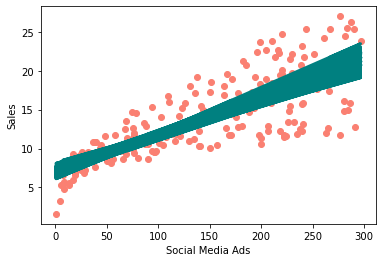

In [275]:
#Calculate the slopes 1000 times using bootstrapping for further evaluation

import statsmodels.formula.api as smf


Slope = []
for i in range(1000):
  bootstrap_df = Ad_df.sample(n = 200, replace = True )
  lm3 = smf.ols(formula= 'Sales ~ Social', data = bootstrap_df).fit()
  Slope.append(lm3.params.Social)
  
  plt.xlabel('Social Media Ads')
  plt.ylabel('Sales')
  plt.plot(bootstrap_df['Social'], lm3.predict(bootstrap_df['Social']), color='teal', linewidth=3)
  
plt.scatter(Ad_df['Social'], Ad_df['Sales'],  color=('salmon'))
plt.show()


**Observations**

- It randomly samples the data with replacement from the original dataset and fits a simple linear regression model using the sampled data as bootstrapping. 
- This process is repeated 1000 times, and the slope coefficient for the 'Social' variable is recorded in each iteration. 

In [229]:
# Find out the 2.5 and 97.5 percentile for the slopes obtained
import numpy as np

Slope = np.array(Slope)
Sort_Slope = np.sort(Slope)


Slope_limits = np.percentile(Sort_Slope, (2.5, 97.5))
Slope_limits

array([0.04191738, 0.05296198])

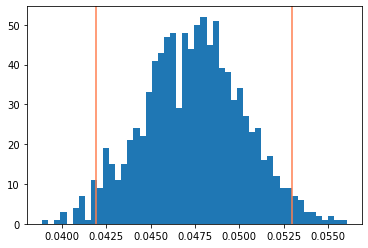

In [230]:
# Plotting the slopes and the upper and the lower limits

plt.hist(Slope, 50)
plt.axvline(Slope_limits[0], color = 'coral')
plt.axvline(Slope_limits[1], color = 'coral')

**Observations**

- Calculates the 2.5th and 97.5th percentiles of the distribution of slope coefficients obtained from bootstrapping. Represent the lower and upper limits of the 95 % confidence interval for the slope parameter. 
- Generates a histogram of the slope coefficients, with vertical lines indicating the 95 % confidence interval limits between 0.04191738, and 0.05296198. 

In [232]:
# Get a more detailed model through statsmodel
import statsmodels.formula.api as smf
lm2a = smf.ols(formula= 'Sales ~ Press', data = Ad_df).fit()
lm2a.params
print(lm2a.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           4.35e-19
Time:                        13:40:23   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

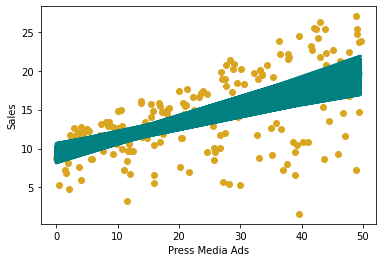

In [277]:
#Calculate the slopes 1000 times using bootstrapping for further evaluation

import statsmodels.formula.api as smf


Slope2 = []
for i in range(1000):
  bootstrap_df = Ad_df.sample(n = 200, replace = True )
  lm3a = smf.ols(formula= 'Sales ~ Press', data = bootstrap_df).fit()
  Slope2.append(lm3a.params.Press)
  
  plt.xlabel('Press Media Ads')
  plt.ylabel('Sales')
  plt.plot(bootstrap_df['Press'], lm3a.predict(bootstrap_df['Press']), color='teal', linewidth=3)
  
plt.scatter(Ad_df['Press'], Ad_df['Sales'],  color=('goldenrod'))
plt.show()

In [236]:
# Find out the 2.5 and 97.5 percentile for the slopes obtained
import numpy as np

Slope2 = np.array(Slope2)
Sort_Slope2 = np.sort(Slope2)


Slope2_limits = np.percentile(Sort_Slope2, (2.5, 97.5))
Slope2_limits

array([0.15999451, 0.2460993 ])

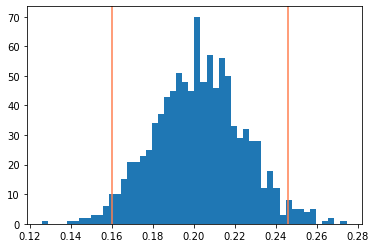

In [237]:
# Plotting the slopes and the upper and the lower limits

plt.hist(Slope2, 50)
plt.axvline(Slope2_limits[0], color = 'coral')
plt.axvline(Slope2_limits[1], color = 'coral')

In [268]:
# Get a more detailed model through statsmodel
import statsmodels.formula.api as smf
lm2b = smf.ols(formula= 'Sales ~ Broadcast', data = Ad_df).fit()
lm2b.params
print(lm2b.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sun, 25 Jun 2023   Prob (F-statistic):            0.00115
Time:                        14:21:00   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

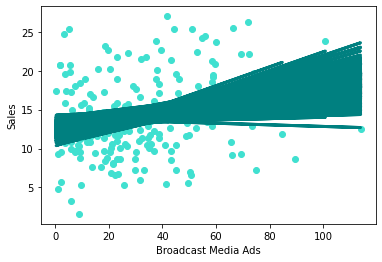

In [278]:
#Calculate the slopes 1000 times using bootstrapping for further evaluation

import statsmodels.formula.api as smf


Slope3 = []
for i in range(1000):
  bootstrap_df = Ad_df.sample(n = 200, replace = True )
  lm3b = smf.ols(formula= 'Sales ~ Broadcast', data = bootstrap_df).fit()
  Slope3.append(lm3b.params.Broadcast)
  
  plt.xlabel('Broadcast Media Ads')
  plt.ylabel('Sales')
  plt.plot(bootstrap_df['Broadcast'], lm3b.predict(bootstrap_df['Broadcast']), color='teal', linewidth=3)
  
plt.scatter(Ad_df['Broadcast'], Ad_df['Sales'],  color=('turquoise'))
plt.show()

In [283]:
# Find out the 2.5 and 97.5 percentile for the slopes obtained
import numpy as np

Slope3 = np.array(Slope3)
Sort_Slope3 = np.sort(Slope3)


Slope3_limits = np.percentile(Sort_Slope3, (2.5, 97.5))
Slope3_limits

array([0.01648197, 0.09324158])

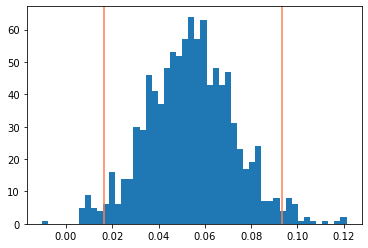

In [285]:
# Plotting the slopes and the upper and the lower limits

plt.hist(Slope3, 50)
plt.axvline(Slope3_limits[0], color = 'coral')
plt.axvline(Slope3_limits[1], color = 'coral')

## Conclusions

To determine the importance and impact of independent variables on sales, it should consider multiple factors, including the coefficient, R-squared value, F-statistic, and associated p-value. Let's analyze the information for the "Social", "Press", and "Broadcast" variables:

"Social Media":
- Coefficient: 0.01953844
- R-squared: 0.612
- F-statistic: 312.1
- Associated p-value: 1.47e-42

"Press Media":
- Coefficient: 0.03006687
- R-squared: 0.332
- F-statistic: 98.42
- Associated p-value: 4.35e-19

"Broadcast":
- Coefficient: 0.0547
- R-squared: 0.052
- F-statistic: 10.89
- Associated p-value: 0.00115


- **Coefficient:** The coefficient represents the change in the dependent variable (sales) for a one-unit increase in the independent variable. In this case, the coefficient for "Press" (0.03006687) is higher than the coefficient for "Social" (0.01953844). The coefficient for "Broadcast" is 0.0547. This means that, on average, for each unit increase in the "Broadcast" variable, the sales slightly increase by 0.0547 units. 


- **R-squared:** The R-squared value measures the proportion of the variance in the dependent variable that can be explained by the independent variable. A higher R-squared value indicates a stronger relationship between the independent variable and sales. In this case, the R-squared value is higher for "Social" (0.612) compared to "Press" (0.332).The R-squared value is 0.052. This implies that the "Broadcast" variable explains approximately 5.2% of the variance in the sales data. In other words, only a small portion of the variation in sales can be attributed to changes in the "Broadcast" variable.


- **F-statistic and associated p-value:** The F-statistic and its associated p-value help determine the overall significance of the regression model. A lower p-value indicates a more significant relationship between the independent variable and the dependent variable. In this case, the F-statistic is higher for "Social" (312.1) compared to "Press" (98.42), and the associated p-value for "Social" (1.47e-42) is much lower than that for "Press" (4.35e-19). The F-statistic for "Broadcast" is 10.89, and the associated p-value is 0.00115. In other words, the relationship between the "Broadcast" variable and sales is unlikely to have occurred by chance.

Based on these factors, it can be concluded that the "Social" variable has a higher impact on sales compared to the "Press" variable. Although the coefficient for "Press" is higher, the higher R-squared value, higher F-statistic, and lower p-value for "Social" indicate a stronger relationship and more significant impact on sales. Although there is a positive coefficient for "Broadcast" which suggests a positive relationship between advertising through broadcasts and sales. However, it's important to note that the impact of the "Broadcast" variable is relatively small, as indicated by the low R-squared value. Overall, this project not only performs a simple linear regression model, and multi linear regression model, but also features engineering, model building, performance assessment, and validation using various regression techniques. It demonstrates the importance of adding relevant features, cross-validation, and regularization for improving the model's performance and generalization capabilities.


## Recommendations

Based on the regression model and the variables included, here are some recommendations for marketing strategies:

- **Focus on Social Media:** The "Social" variable has a coefficient of 0.0195 and a relatively high R-squared value of 0.612. This suggests that social media advertising has a stronger impact on sales compared to other variables. Consider allocating more resources and efforts towards social media marketing campaigns to potentially increase sales.


- **Evaluate Press Advertising Effectiveness:** The "Press" variable has a coefficient of 0.0301 and an R-squared of 0.332. While the impact of press advertising on sales is not as strong as social media, it still shows some influence. Review the effectiveness of press advertising campaigns and consider optimizing them to maximize their impact on sales.


- **Consider Broadcast Advertising:** Although the impact of the "Broadcast" variable is relatively small (coefficient of 0.0547 and R-squared of 0.052), it still shows a statistically significant relationship with sales. Explore opportunities for targeted broadcast advertising, such as TV or radio commercials, to complement marketing efforts.


- **Explore Synergistic Marketing Approaches:** Instead of relying solely on one marketing channel, consider implementing a synergistic approach. Combine social media, broadcast advertising, and press advertising to create a comprehensive marketing strategy. Look for opportunities to integrate these channels and reinforce brand message across different platforms for a more cohesive and impactful marketing campaign.


- **Monitor and Adjust:** Continuously monitor the performance of marketing strategies and measure their impact on sales. Regularly analyze the results and make adjustments based on the insights gained. This iterative approach will help refine marketing strategies over time and improve their effectiveness.


- **Consider Other Factors:** Keep in mind that the regression model is based on the variables included and their relationship with sales. There may be other factors that can influence sales but were not considered in this model. Take into account additional market research, customer insights, and industry trends to develop a well-rounded marketing strategy.


Remember that these recommendations are based on the available information and the regression model results. It's important to interpret the findings in conjunction with other relevant data and consider the specific context of business to tailor the marketing strategies accordingly.